<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/AutoEncoders_Master_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Prepare the nice data set
from sklearn.model_selection import train_test_split

In [11]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [12]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
downloaded = drive.CreateFile({'id':'1Bi2fJZw6Vhj7dyP7Ad6qtPsYf5LevEm4'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing
#https://drive.google.com/file/d/14RfDnc5maSGzxripjhH3Z6B2asdpFbbX/view?usp=sharing
#https://drive.google.com/file/d/11eCGs8j8V8bBFZBwT1nNvrGzdrQVmhWE/view?usp=sharing
#DVL1______C_8000
#https://drive.google.com/file/d/1Bi2fJZw6Vhj7dyP7Ad6qtPsYf5LevEm4/view?usp=sharing

In [15]:
#Importing all the libraries
import numpy as np
import numpy as geek 
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation 
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [16]:
downloaded.GetContentFile('Master_thesis_Data.csv')

In [17]:
import pandas as pd
df2 = pd.read_csv('Master_thesis_Data.csv') 
df2=df2.drop(columns=['Unnamed: 13', 'Unnamed: 14'])
#Cleaning the data, for mainly removing the NaN value
df2["Time"] = df2["Time"].fillna(0)
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)
df2["DVL1_S"] = df2["DVL1_S"].fillna(0)
df2["DVL2_S"] = df2["DVL2_S"].fillna(0)
df2["DVL3_S"] = df2["DVL3_S"].fillna(0)
df2["DVL4_S"] = df2["DVL4_S"].fillna(0)
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,AutoHeading
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,0.000980,-0.000342,0.0110,0.0646
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,0.000990,-0.000342,0.0230,0.0643
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,0.001010,-0.000342,0.0392,0.0641
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,0.001040,-0.000342,0.0595,0.0632


In [18]:
t=df2['Time']
Tdata=df2['DVL1_S']
X1=np.array(Tdata)
Tdata2=df2['DVL2_S']
X2=np.array(Tdata2)
Tdata3=df2['DVL3_S']
X3=np.array(Tdata)
Tdata4=df2['DVL4_S']
X4=np.array(Tdata4)

In [19]:
Tdata5=df2['ROV6DOF']
X5=np.array(Tdata5)
Tdata6=df2['ROV6DOF.1']
X6=np.array(Tdata6)
Tdata7=df2['ROV6DOF.2']
X7=np.array(Tdata7)
Tdata8=df2['AutoHeading']
X8=np.array(Tdata8)

In [20]:
# Stacking the two arrays along axis 0 
out_arr1 = geek.stack((X1, X2, X3,X4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_arr1) 
print ("Output Shape:\n ", out_arr1.shape) 

Output stacked array along axis 0:
  [[ 0.       20.       20.       ...  2.692715  2.69274   2.692755]
 [ 0.       20.       20.       ...  1.8       1.8       1.8     ]
 [ 0.       20.       20.       ...  2.692715  2.69274   2.692755]
 [ 0.       20.       20.       ...  2.615951  2.61597   2.615983]]
Output Shape:
  (4, 84991)


In [21]:
#Data need to adjust in a way...
X= out_arr1
X.shape

(4, 84991)

In [22]:
X.shape

(4, 84991)

In [23]:
N = X.shape[1]
M = N//20
rem = geek.remainder(X.shape[1],20)
X_crop = X[:,:N-rem]
X_crop.shape

(4, 84980)

In [86]:
Input_Data_orignal_for_Graph= X_crop

In [87]:
Input_Data_orignal_for_Graph.shape

(4, 84980)

In [88]:
Input_Data_orignal_for_Graph_Trans= Input_Data_orignal_for_Graph.transpose((1,0))

In [89]:
Input_Data_orignal_for_Graph_Trans.shape

(84980, 4)

In [90]:
# Due to the vectors, all the one dimensions.....


In [24]:
X_split = geek.reshape(X_crop,(4,20,M))

In [25]:
X=X_split

In [26]:
X.shape

(4, 20, 4249)

In [27]:
#Converting the shape of the output...
o=df2['DVL1']
y1=np.array(o)
oo=df2['DVL2']
y2=np.array(oo)
ooo=df2['DVL3']
y3=np.array(ooo)
oo2=df2['DVL4']
y4=np.array(oo2)
#Converting labels in to the matrix to feed in to the NN

In [28]:
# Stacking the two arrays along axis 0 
out_lab1 = geek.stack((y1, y2, y3, y4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_lab1) 
print ("Labels Shape 0:\n ", out_lab1.shape) 

Output stacked array along axis 0:
  [[ 0.       20.       20.       ...  2.692715  2.69274   2.692755]
 [ 0.       20.       20.       ...  2.630637  2.631916  2.633157]
 [ 0.       20.       20.       ...  2.619866  2.61945   2.618994]
 [ 0.       20.       20.       ...  2.615951  2.61597   2.615983]]
Labels Shape 0:
  (4, 84991)


In [29]:
normalized_y = out_lab1

In [59]:
normalized_y.shape

(4, 84991)

In [61]:
c=normalized_y

In [63]:
c[:].

(4, 84991)

In [30]:
y_crop = normalized_y[:,:N-rem]
y_split = geek.reshape(y_crop,(4,20,M))
y_split.shape
y=y_split
y.shape

(4, 20, 4249)

In [31]:
n_features= 4; n_steps=20

In [32]:
#Input Shape
X.shape

(4, 20, 4249)

In [33]:
#Target/Ground Truth Shape
y.shape

(4, 20, 4249)

In [34]:
#Implementing the encoders for the improving the working system for the order of getting the better resutls
input_img= X

X = X_split.transpose((2,1,0))
y = y_split.transpose((2,1,0))

In [35]:
X.shape

(4249, 20, 4)

In [36]:
y.shape

(4249, 20, 4)

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [38]:
X_train.shape

(2549, 20, 4)

In [39]:
X_val.shape

(850, 20, 4)

In [40]:
X_test.shape

(850, 20, 4)

In [41]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_val size: {}".format(X_val.shape))
print("y_val size: {}".format(y_val.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (2549, 20, 4)
y_train size: (2549, 20, 4)
X_val size: (850, 20, 4)
y_val size: (850, 20, 4)
X_test size: (850, 20, 4)
y_test size: (850, 20, 4)


In [42]:
import numpy as np 
import matplotlib.pyplot as plt

In [43]:
n_steps= 20

**Input**

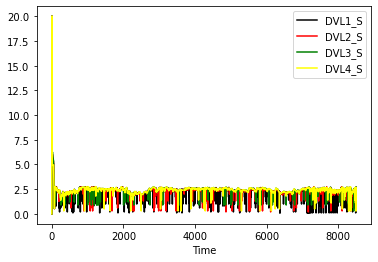

In [44]:
ax = plt.gca()
#Inputs
df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

**Target**

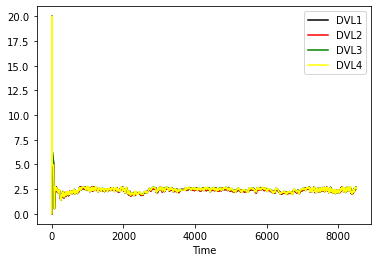

In [45]:
ax = plt.gca()
#Ground Trth
df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()

In [46]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
input_img=Input(shape=(n_steps, n_features))
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv1D(32, 3, activation='relu', padding='same')(input_img)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
x = MaxPooling1D(2, padding='same')(x)
#Encoding 1/8..
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Flatten()(x)
decoded = Dense(n_features*n_steps, activation='linear')(x)
outputs= Reshape((n_steps, n_features))(decoded)
#tf.reshape(tensor, shape, name=None)
autoencoder = Model(input_img, outputs)
autoencoder.compile(optimizer='adam', loss='mse')


In [47]:
from keras.datasets import mnist
import numpy as np

#(x_train, _), (x_test, _) = mnist.load_data()

#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), n_steps, n_features))  # adapt this if using `channels_first` image data format
X_test = np.reshape(X_test, (len(X_test), n_steps, n_features))  # adapt this if using `channels_first` image data format

In [48]:
X_train.shape

(2549, 20, 4)

In [ ]:
from keras.callbacks import TensorBoard, EarlyStopping

es =EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=100,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
autoencoder.fit(X_train, y_train,
                epochs=10000,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, y_val), 
                callbacks= [es], verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Early Stopping.. Can be a wise option to observe
#tf.keras.callbacks.EarlyStopping(
   # monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False
#)

In [52]:
TestingDataPrediction=autoencoder.predict(X_test)

In [53]:
TestingDataPrediction.shape

(850, 20, 4)

**Plotting all the data**

In [91]:
dates = df2['Time']
train_date = dates[:45000]
test_data = dates[-17000:]

In [ ]:
# Converting it in to the orignal shape

In [56]:
test_data

84141    8414.0
84142    8414.1
84143    8414.2
84144    8414.3
84145    8414.4
          ...  
84986    8498.5
84987    8498.6
84988    8498.7
84989    8498.8
84990    8498.9
Name: Time, Length: 850, dtype: float64

In [ ]:
TestingDataPrediction*20/20

In [64]:
TestingDataPrediction.shape

(850, 20, 4)

In [82]:
O= TestingDataPrediction

In [83]:
O.shape

(850, 20, 4)

In [65]:
Pred=TestingDataPrediction.shape[1]

In [76]:
Z= Pred

In [77]:
Z

20

In [84]:
Prediction_X_test = geek.reshape(O,(O.shape[0]*O.shape[1],O.shape[2]))

In [85]:
Prediction_X_test.shape

(17000, 4)

In [94]:
Input_Data_orignal_for_Graph_Trans.shape

(84980, 4)

In [101]:
#dates = df2['Time']
Label_Testing = Input_Data_orignal_for_Graph_Trans[-17000:]
#test_data = dates[-17000:]

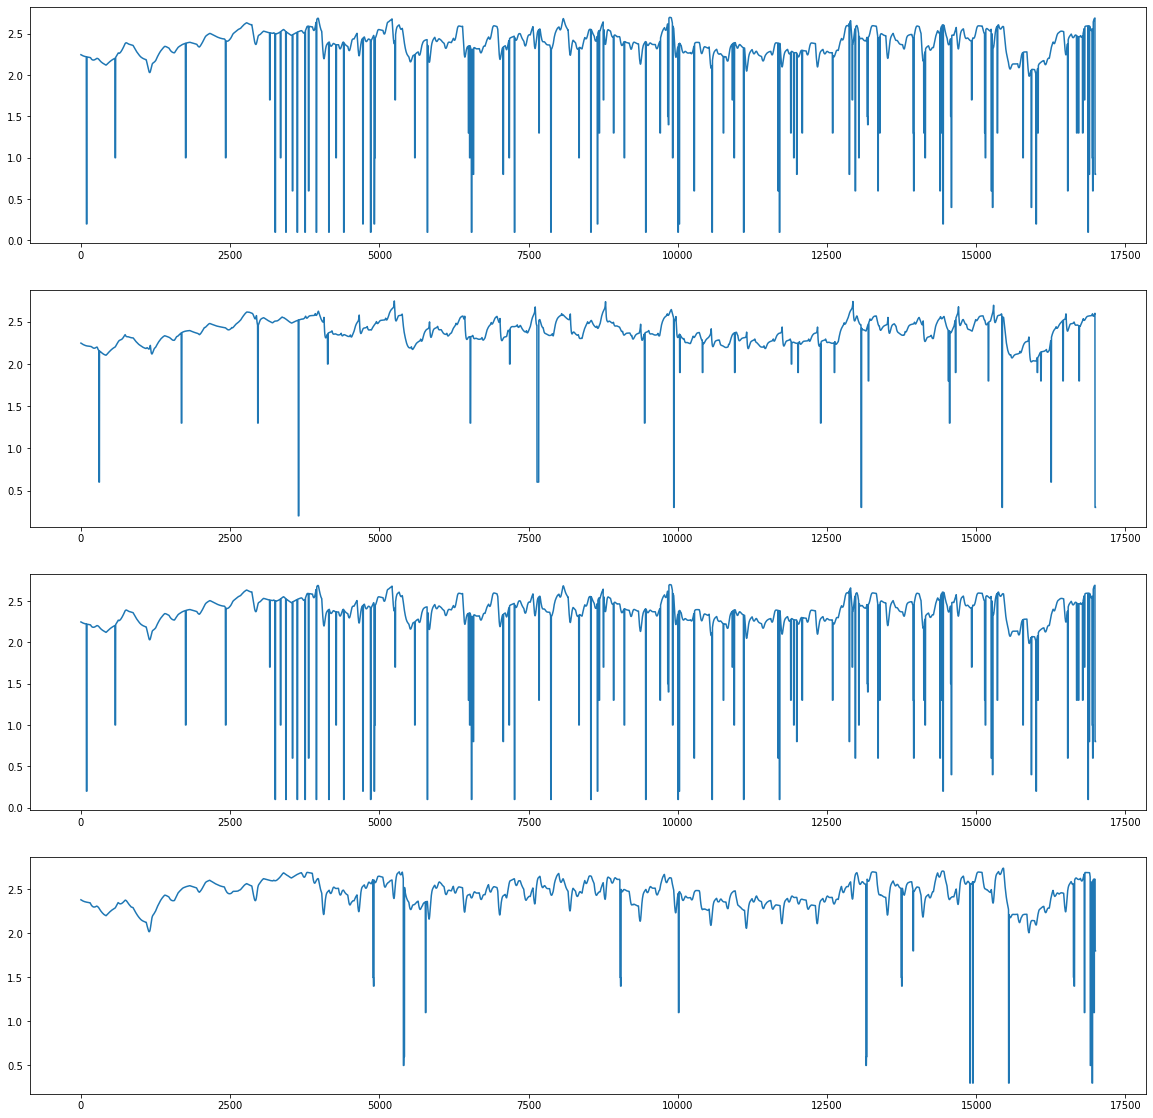

In [103]:

t = np.arange(len(test_data))
fig, axs = plt.subplots(4,1,squeeze=True,figsize=(20,20))
for i in range(4):
  axs[i].plot(t,Label_Testing[:,i])

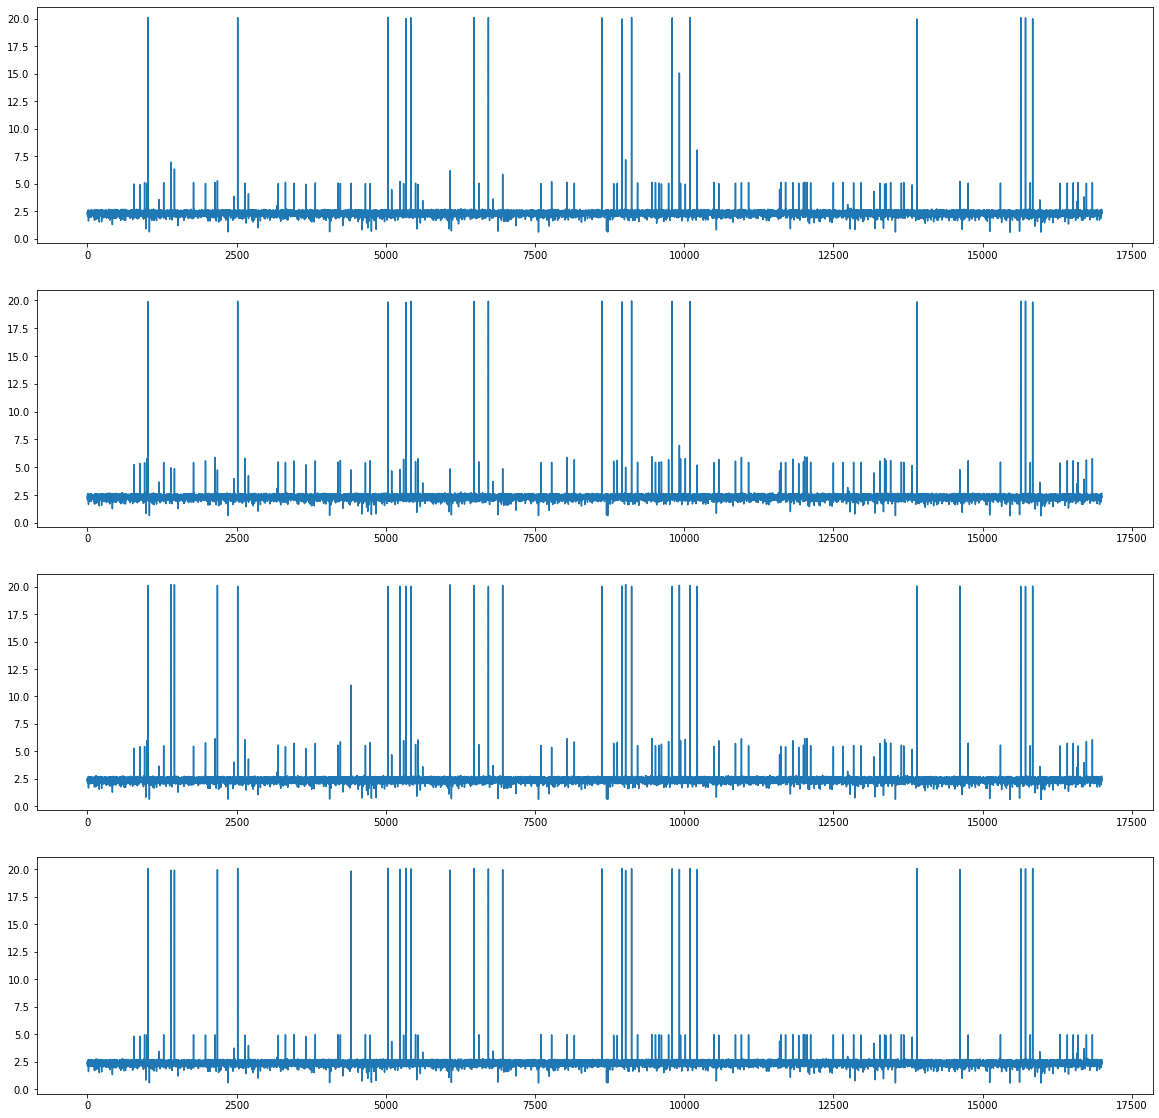

In [104]:

t = np.arange(len(test_data))
fig, axs = plt.subplots(4,1,squeeze=True,figsize=(20,20))
for i in range(4):
  axs[i].plot(t,Prediction_X_test[:,i])

In [106]:
for i in range(4):
  Prediction_X_test[:,i]

In [108]:
Beam_1=Prediction_X_test[:,1]

In [109]:
Beam_1.shape

(17000,)

In [110]:
Beam_2=Prediction_X_test[:,2]

In [111]:
Beam_3=Prediction_X_test[:,3]

In [113]:
Beam_4=Prediction_X_test[:,0]

In [114]:
for i in range(4):
 Label_Testing[:,i]

In [115]:
Beam_1_Label= Label_Testing[:,1]

In [116]:
Beam_2_Label= Label_Testing[:,2]

In [117]:
Beam_3_Label = Label_Testing[:,3]

In [118]:
Beam_4_Label = Label_Testing[:,0]

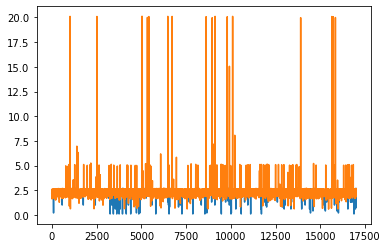

In [124]:
ax = plt.gca()
#Inputs
plt.plot(t,Beam_4_Label)
plt.plot(t, Beam_4)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

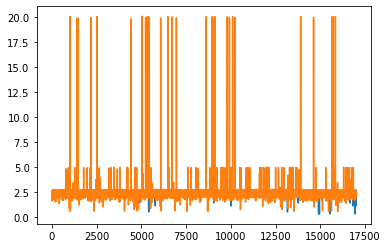

In [125]:
ax = plt.gca()
#Inputs
plt.plot(t,Beam_3_Label)
plt.plot(t, Beam_3)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

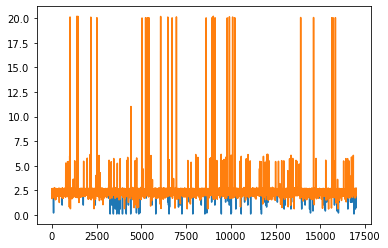

In [126]:
ax = plt.gca()
#Inputs
plt.plot(t,Beam_2_Label)
plt.plot(t, Beam_2)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

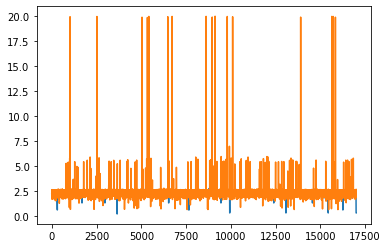

In [127]:
ax = plt.gca()
#Inputs
plt.plot(t,Beam_1_Label)
plt.plot(t, Beam_1)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()